In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import numpy as np
from google.colab import files
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Input, Dense, Activation, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization
from keras import optimizers
from keras import losses
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

Using TensorFlow backend.


In [4]:
uploaded = files.upload()

Saving test_data.npy to test_data.npy
Saving train_data.npy to train_data.npy
Saving train_label.npy to train_label.npy


In [0]:
# load dataset
train_x = np.load('train_data.npy')
train_x = train_x.reshape(400,64,64,1)
train_y = np.load('train_label.npy')

In [0]:
# Preprocessing Training label set Y


def prepare_labels(labels):
    ohe = OneHotEncoder()
    # reshape labels to be 2D array
    labels = labels.reshape(len(labels),1)
    ohe.fit(labels)
    labels_enc = ohe.transform(labels).toarray()
    return labels_enc


y_processed = prepare_labels(train_y)

In [0]:
# Split Training set and validation set

x_train, x_vali, y_train, y_true = train_test_split(train_x,  \
                                y_processed, test_size = 0.3)

In [0]:
# create image data augmentation generator
datagen = ImageDataGenerator(shear_range=1)
#datagen.fit(x_train)

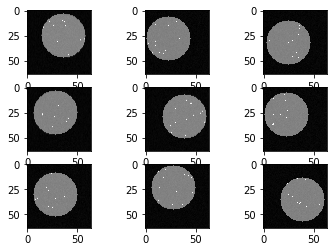

In [9]:
pyplot.imshow(x_train[11].reshape(64, 64), cmap=pyplot.get_cmap('gray'))

for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(64, 64), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

In [17]:
# Model

model = Sequential()

model.add(Conv2D(16,(3,3), input_shape=(64,64,1), strides=(1,1), padding='same', activation='relu',
                 use_bias=True, kernel_initializer='RandomNormal', bias_initializer='RandomNormal'))
model.add(MaxPooling2D(pool_size=(2,2), strides=None))
model.add(Dropout(0.25))

model.add(Conv2D(32,(3,3), strides=(1,1), padding='same', activation='relu',
                 use_bias=True, kernel_initializer='RandomNormal', bias_initializer='RandomNormal'))
model.add(MaxPooling2D(pool_size=(2,2), strides=None))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3), strides=(1,1), padding='same', activation='relu',
                 use_bias=True, kernel_initializer='RandomNormal', bias_initializer='RandomNormal'))
model.add(MaxPooling2D(pool_size=(2,2), strides=None))
model.add(Dropout(0.25))

#model.add(Conv2D(64,(3,3), strides=(1,1), padding='same', activation='relu',
#          use_bias=True, kernel_initializer='RandomNormal', bias_initializer='RandomNormal'))
#model.add(MaxPooling2D(pool_size=(2,2), strides=None))
#model.add(Dropout(0.25))
#model.add(Conv2D(256,(3,3), strides=(1,1), padding='same', activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2), strides=None))
#model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))


# Training and validating

model.compile('rmsprop', 'categorical_crossentropy', metrics=['accuracy'],)
filepath = "weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss',verbose=1,save_best_only=True, mode='max')
callbacks_list = [checkpoint]
model.fit_generator(datagen.flow(x_train, y_train, batch_size=10), steps_per_epoch=len(x_train)/10,
          epochs=150, verbose=1, validation_data=(x_vali,y_true))



Epoch 1/150
28/28 [==============================] - 1s 24ms/step - loss: 1.1714 - acc: 0.7000 - val_loss: 0.9741 - val_acc: 0.7333
Epoch 2/150
28/28 [==============================] - 0s 7ms/step - loss: 0.8526 - acc: 0.7321 - val_loss: 0.5586 - val_acc: 0.7333
Epoch 3/150
28/28 [==============================] - 0s 10ms/step - loss: 0.5866 - acc: 0.7714 - val_loss: 0.4826 - val_acc: 0.8000
Epoch 4/150
28/28 [==============================] - 0s 10ms/step - loss: 0.5492 - acc: 0.7750 - val_loss: 0.4685 - val_acc: 0.8167
Epoch 5/150
28/28 [==============================] - 0s 8ms/step - loss: 0.4825 - acc: 0.7893 - val_loss: 0.4516 - val_acc: 0.8417
Epoch 6/150
28/28 [==============================] - 0s 9ms/step - loss: 0.4776 - acc: 0.8214 - val_loss: 0.4571 - val_acc: 0.7833
Epoch 7/150
28/28 [==============================] - 0s 9ms/step - loss: 0.4455 - acc: 0.8036 - val_loss: 0.4195 - val_acc: 0.8333
Epoch 8/150
28/28 [==============================] - 0s 8ms/step - loss: 0.4800 

In [18]:
# Confusion Matrix

y_pred = model.predict(x_vali)
y_pred_cm = y_pred.argmax(axis=1)
y_true_cm = y_true.argmax(axis=1)
confusion_matrix(y_true_cm, y_pred_cm)

array([[ 9,  0,  0,  2,  0,  0],
       [ 0,  4,  0,  0,  0,  0],
       [ 0,  0,  6,  0,  0,  0],
       [ 0,  0,  0,  5,  0,  0],
       [ 0,  0,  0,  0, 88,  0],
       [ 0,  0,  0,  0,  0,  6]])

In [19]:
# Classification Report
target_names = list(np.unique(train_y))
print(classification_report(y_true_cm, y_pred_cm, target_names=target_names))

              precision    recall  f1-score   support

       crack       1.00      0.82      0.90        11
      deform       1.00      1.00      1.00         4
        edge       1.00      1.00      1.00         6
      nodule       0.71      1.00      0.83         5
        pass       1.00      1.00      1.00        88
  total_loss       1.00      1.00      1.00         6

    accuracy                           0.98       120
   macro avg       0.95      0.97      0.96       120
weighted avg       0.99      0.98      0.98       120



In [0]:
model.save_weights('b9425_try.h5')

In [0]:
test_x = np.load('test_data.npy')
test_x = test_x.reshape(400,64,64,1)
res = model.predict(test_x)
res = res.argmax(axis=1)
#print(res)
#res_cm = res_cm.reshape(400,1)
#np.save('prediction', res)

In [0]:
res_str = []

for num in res:
  if num == 4:
    num = 'pass'
  elif num == 3:
    num = 'nodule'
  elif num == 2:
    num = 'edge'
  elif num == 0:
    num = 'crack'
  elif num == 1:
    num = 'deform'
  elif num == 5:
    num = 'total_loss'
  res_str.append(num)

In [22]:
np.save('prediction', res_str)
print(res_str)

['total_loss', 'nodule', 'pass', 'deform', 'pass', 'deform', 'deform', 'edge', 'pass', 'pass', 'pass', 'pass', 'edge', 'pass', 'pass', 'pass', 'deform', 'pass', 'pass', 'pass', 'pass', 'pass', 'pass', 'pass', 'pass', 'edge', 'pass', 'pass', 'pass', 'pass', 'pass', 'pass', 'nodule', 'pass', 'pass', 'crack', 'crack', 'pass', 'pass', 'pass', 'pass', 'pass', 'pass', 'pass', 'pass', 'pass', 'nodule', 'pass', 'pass', 'edge', 'pass', 'pass', 'edge', 'pass', 'deform', 'pass', 'pass', 'nodule', 'pass', 'pass', 'pass', 'pass', 'total_loss', 'edge', 'pass', 'crack', 'pass', 'pass', 'nodule', 'nodule', 'crack', 'pass', 'edge', 'pass', 'pass', 'total_loss', 'pass', 'pass', 'pass', 'pass', 'crack', 'nodule', 'total_loss', 'pass', 'pass', 'pass', 'pass', 'pass', 'pass', 'pass', 'crack', 'pass', 'pass', 'edge', 'pass', 'edge', 'pass', 'pass', 'nodule', 'pass', 'pass', 'pass', 'pass', 'pass', 'pass', 'pass', 'pass', 'pass', 'pass', 'pass', 'pass', 'deform', 'pass', 'total_loss', 'pass', 'pass', 'edge',